# Tarea 2 Análisis Numérico II

- Autor: Diego Astaburuaga
- Rol: 202010018-7


Recolectamos un par de funciones que ya hemos fabricados en laboratorios anteriores.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

class COOMat:
    nf = 0 # cantidad de filas
    nc = 0 # cantidad de columnas
    
    f = [] # indices de filas
    c = [] # indices de columnas
    e = [] # elementos
        
    def __init__(self,nf_,nc_,f_,c_,e_): # inicializar matriz de tamaño nf_ x nc_ con elementos
        self.nf=nf_
        self.nc=nc_
        self.f=f_
        self.c=c_
        self.e=e_
            
    def Ax(self,x):
        nnz = self.e.size
        y = np.zeros(self.nf)
        for j in range(nnz):
            y[self.f[j]] = y[self.f[j]] + self.e[j]*x[self.c[j]]
        
        return y
    
    def full(self):
        Afull = np.zeros((self.nf,self.nc))
        nnz = self.e.size
        for j in range(nnz):
            Afull[(self.f)[j],(self.c)[j]] = (self.e)[j]
        
        return Afull

## Descripción del problema.

Sea $\Omega=(0,1)^2$, $\mu:\Omega\rightarrow\mathbb{R}_{>0}$ una función positiva, y
$u:\Omega\rightarrow\mathbb{R}^1$ una función vectorial. El objetivo es aproximar la solución $u$ de la ecuación de Poisson de dos dimensiones:

\begin{align}
  \begin{split}
  -{\rm div}\;(\mu(x) \nabla u (x)) &= f(x) \text{ para todo } x\in\Omega,\\
  u(x) &= 0 \text{ para todo } x\in\partial\Omega
  \end{split}
\end{align}

con diferencias finitas. Para generar una malla, usamos los puntos $x_j = jh$, $j=0,\dots, n+1$, donde $n+1 = 1/h$, y $x_{ij} = (x_i,x_j)$. Definimos las mallas

\begin{align*}
  \Omega_h &:= \left\{ x_{ij} \mid 1 \leq i,j\leq n \right\},\\
  \overline\Omega_h &:= \left\{ x_{ij} \mid 0 \leq i,j\leq n+1 \right\},\\
  \partial\Omega_h &:=\overline\Omega_h \setminus\Omega_h.
\end{align*}

y hallamos $u_h:\overline\Omega_h\rightarrow\mathbb{R}$ dada por

\begin{align*}
  \begin{split}
  -{\rm div}_h\; (\mu(x_{ij}) \nabla_h u(x_{ij})) &= f(x_{ij}) \text{ para todo } x_{ij}\in\Omega_h,\\
  u_h(x_{ij}) &= 0 \text{ para todo } x_{ij}\in\partial\Omega_h,
  \end{split}
\end{align*}

donde

\begin{align*}
  \nabla_h u(x_{ij}) :=
  \begin{pmatrix}
    \frac{u(x_{ij})-u(x_{i-1,j})}{h}\\
    \frac{u(x_{ij})-u(x_{i,j-1})}{h}
  \end{pmatrix}
\end{align*}

y

\begin{align*}
  {\rm div}_h v(x_{ij}) := \frac{v_1(x_{i+1,j}) - v_1(x_{ij})}{h} + \frac{v_2(x_{i,j+1}) - v_2(x_{ij})}{h}.
\end{align*}

Si usamos la numeración *lexicográfica*

*mdf:2d:lex*

\begin{align}
  \underline u_{h,(j-1) n+i}  = u_h(x_{ij}).
\end{align}

llegamos al sistema $A_h \underline u_h = \underline f_h$, donde $\underline f_{h,(j-1) n+i}  = f(x_{ij})$.

Explicite la discretización de

\begin{align*}
  \begin{split}
  -{\rm div}_h\; (\mu(x_{ij}) \nabla_h u(x_{ij})) 
  \end{split}
\end{align*}

y complete el código de abajo para que calcule la matriz $A_h$.

### Discretización del problema.

De la discretización de $\nabla_h u(x_{ij})$, se tiene que

\begin{equation*}
    g(x_{ij})
    :=
    \mu(x_{ij})\nabla_h u(x_{ij})
    =
    \begin{pmatrix}
        \frac{\mu(x_{ij})(u(x_{ij})-u(x_{i-1,j}))}{h}\\
        \frac{\mu(x_{ij})(u(x_{ij})-u(x_{i,j-1}))}{h}
    \end{pmatrix}
    :=
    \begin{pmatrix}
        g_1(x_{ij})\\
        g_2(x_{ij})
    \end{pmatrix}
\end{equation*}

de esta forma

\begin{align*}
  \begin{split}
  
  \end{split}
\end{align*}

\begin{equation*}
  \begin{aligned}
    -{\rm div}_h\; (g(x_{ij}))
    =
    -{\rm div}_h\; (\mu(x_{ij}) \nabla_h u(x_{ij}))
    :=
    \frac{g_1(x_{ij})- g_1(x_{i+1,j})}{h} + \frac{g_2(x_{ij}) - g_2(x_{i,j+1})}{h}.
  \end{aligned}
\end{equation*}

se sigue con

\begin{equation*}
  \begin{aligned}
    -{\rm div}_h\; (\mu(x_{ij}) \nabla_h u(x_{ij}))
    =& h^{-1}(g_1(x_{ij})+g_2(x_{ij})-g_1(x_{i+1,j})-g_2(x_{i,j+1}))\\
    =& h^{-2}(\mu(x_{ij})(u(x_{ij})-u(x_{i-1,j}))+\mu(x_{ij})(u(x_{ij})-u(x_{i,j-1}))\\&-\mu(x_{i+1,j})(u(x_{i+1,j})-u(x_{i,j}))-\mu(x_{i,j+1})(u(x_{i,j+1})-u(x_{i,j})))\\
    =& f(x_{ij})
  \end{aligned}
\end{equation*}
para todo $x_{ij}\in \Omega$, mientras que $u_h(x_{ij})=0$ para $x_{ij}\in \partial \Omega$. Es decir:
\begin{equation*}
    u(x_{ij})=0,\quad \text{si } i\in \{0,n+1\}\vee j\in\{0,n+1\}
\end{equation*}

Por simplicidad, denote $\mu(x_{i,j})$ como $\mu_{i,j}$, de esta forma se puede escribir
\begin{equation*}
    f(x_{ij})= h^{-2}
    \left(
    \begin{aligned}
            &2\mu_{i,j}u(x_{i,j})-\mu_{i,j}u(x_{i-1,j})-\mu_{i,j}u(x_{i,j-1})\\
            &-\mu_{i+1,j}u(x_{i+1,j})+\mu_{i+1,j}u(x_{i,j})-\mu_{i,j+1}u(x_{i,j+1})+\mu_{i,j+1}u(x_{i,j})
    \end{aligned}
    \right)
\end{equation*}

agrupando términos en función de $u$, $f(x_{ij})$:

\begin{equation*}
    h^{-2}
    \left(
        (2\mu_{ij}+\mu_{i+1,j}+\mu_{i,j+1})u(x_{ij})
        +(-\mu_{ij})u(x_{i-1,j})
        +(-\mu_{ij})u(x_{i,j-1})
        +(-\mu_{i+1,j})u(x_{i+1,j})
        +(-\mu_{i,j+1})u(x_{i,j+1})
    \right)
\end{equation*}

Escriba $C^{(1)}_{ij}:=2\mu_{ij}+\mu_{i+1,j}+\mu_{i,j+1}$, luego de forma análoga al patrón de 5 puntos descrito en las notas de clases:
\begin{equation*}
    f(x_{ij})=\frac{C^{(1)}_{ij} u(x_{ij})-\mu(x_{i+1,j})u(x_{i+1,j})-\mu(x_{ij})u(x_{i-1,j})-\mu(x_{i,j+1})u(x_{i,j+1})-\mu(x_{ij})_{ij}u(x_{i,j-1})}{h^2}
\end{equation*}

### Construcción de la matriz $A_h$

Utilizando la condición de borde, se tiene que si $i\in\{0,n+1\}$ o bien $j\in\{0,n+1\}$, entonces $u(x_{i,j})=0$. En total se tienen $(n+2)^2$ variables desconocidas $u(x_{i,j})$, pero tomando en cuenta la condición de borde, estas se reducen a $n^2$ variables desconocidas $u(x_{i,j})$ para $1\leq i,j\leq n$ y una colección de $n^2$ ecuaciones lineales dadas por la ecuación anterior. Para esto considere $\underline{u}_h\in \mathbb{R}^{n^2}$ escrito en notación lexicográfica:

\begin{equation*}
    \underline{u}_{h,(j-1)n+i}=u(x_{i,j})
\end{equation*}

Notese que la matriz que se espera construir tiene la misma estructura que la matriz estudiada en clases, esto es, un bloque diagonal de matrices tridiagonales y un bloque superior e inferior se matrices diagonales.

Consideraciones:

- El bloque diagonal contiene matrices tridiagonales de tamaño $n\times n$, donde cada matriz contiene $3n-2$ elementos y por lo tanto considerando el bloque diagonal, hay $n(3n-2)$ elementos.
- En tanto al bloque superdiagonal, estas son $n-1$ matrices con $n$ elementos cada una, como esto se repite para el bloque subdiagonal, entonces entre estos suman $2n(n-1)$ elementos.
- Por lo tanto la matriz $A_h$ es de carácter sparse con $n(3n-2)+2n(n-1)$.
- Por construcción: $h=\frac{1}{n+1}$.

Note que los valores de la matriz $A_h$ dependen de los indices $i,j$. Defina la transformación $\sigma((i,j))=(j-1)n+i$, por construcción no es difícil notar que la función es inyectiva, denotando la división entera por $//$, dado $1\leq k\leq n^2$, se tiene que

\begin{equation*}
    \sigma^{-1}(k)=(k-(k//n),1+k//n)=(i,j)
\end{equation*}

lo que permite tener una relación entre los indices de la matriz $A_h$ y los indices iniciales $i,j$ con los que se definen las constantes $C_{ij}^{(1)}$ y $C_{ij}^{(2)}$.

Denote $A_h=(a_{p,q})$ con $1\leq p,q\leq n^2$. Con esto es directo notar los siguientes puntos:
- $C_{\sigma^{-1}(k)}^{(1)}=a_{k,k}$
- Mientras que el resto de elementos...

In [2]:
def calculC1param(mu, p: int, N: int):
    '''
    - calculate the parameter C1 given the first coordenate p (p,q)
    - 1 \leq p \leq n^2
    '''
    i, j = p-p//N, 1+p//N
    h = 1/(N+1)
    C = 2*mu(i*h, j*h)+mu((i+1)*h,j*h)+mu(i*h,(j+1)*h)
    return C

def calculC2param(mu, p: int, N: int):
    '''
    - calculate the parameter C2 given the first coordenate p (p,q)
    - 1 \leq p \leq n^2
    '''
    i, j = p-p//N, 1+p//N
    h = 1/(N+1)
    C = -1*mu(i*h, j*h)
    return C

In [3]:
def stima2d(N,mu):
    nnz = N*(3*N-2) + 2*(N-1)*N # number of element non zero
    f = np.zeros(nnz,dtype='int')
    c = np.zeros(nnz,dtype='int')
    e = np.zeros(nnz)
    
    # block diagonal
    for k in range(N):
        offset = k*(3*N-2) # number of elements already calculated
        
        # diagonal
        for j in range(N):
            f[offset + j] = k*N + j
            c[offset + j] = k*N + j
            e[offset + j] = calculC1param(mu, k*N+j+1, N)  
        
        # superdiagonal
        for j in range(N-1):
            f[offset + N + j] = k*N + j
            c[offset + N + j] = k*N + j+1
            e[offset + N + j] = calculC2param(mu, k*N+j+1, N)
        
        # subdiagonal
        for j in range(N-1):
            f[offset + 2*N-1 + j] = k*N + j+1
            c[offset + 2*N-1 + j] = k*N + j
            e[offset + 2*N-1 + j] = calculC2param(mu, k*N+j+2, N)
            
    # block superdiagonal
    for k in range(N-1):
        offset = N*(3*N-2) + k*N # number of elements already calculated
        
        # diagonal
        for j in range(N):
            f[offset + j] = k*N + j
            c[offset + j] = k*N + j + N
            e[offset + j] = calculC2param(mu, k*N + j+1, N)
            
    # block subdiagonal
    for k in range(N-1):
        offset = N*(3*N-2) + (N-1)*N + k*N  # number of elements already calculated
        
        # diagonal
        for j in range(N):
            f[offset + j] = k*N + j + N
            c[offset + j] = k*N + j
            e[offset + j] = calculC2param(mu, k*N + j + N+1, N)
            
    e = (N+1)*(N+1)*e # divide each value by h^2

    return COOMat(N*N,N*N,f,c,e)

La siguiente función calcula el vector $\underline f_h$.

In [4]:
def loadvec2d(N,ff):
    f = np.zeros(N*N)
    
    x = np.linspace(0,1,N+2)
    X,Y = np.meshgrid(x,x)
    
    for j in range(N):
        for k in range(N):
            f[j*N+k] = ff( X[j,k], Y[j,k] )
            
    return f

Verifique si su código calcula algo razonable:

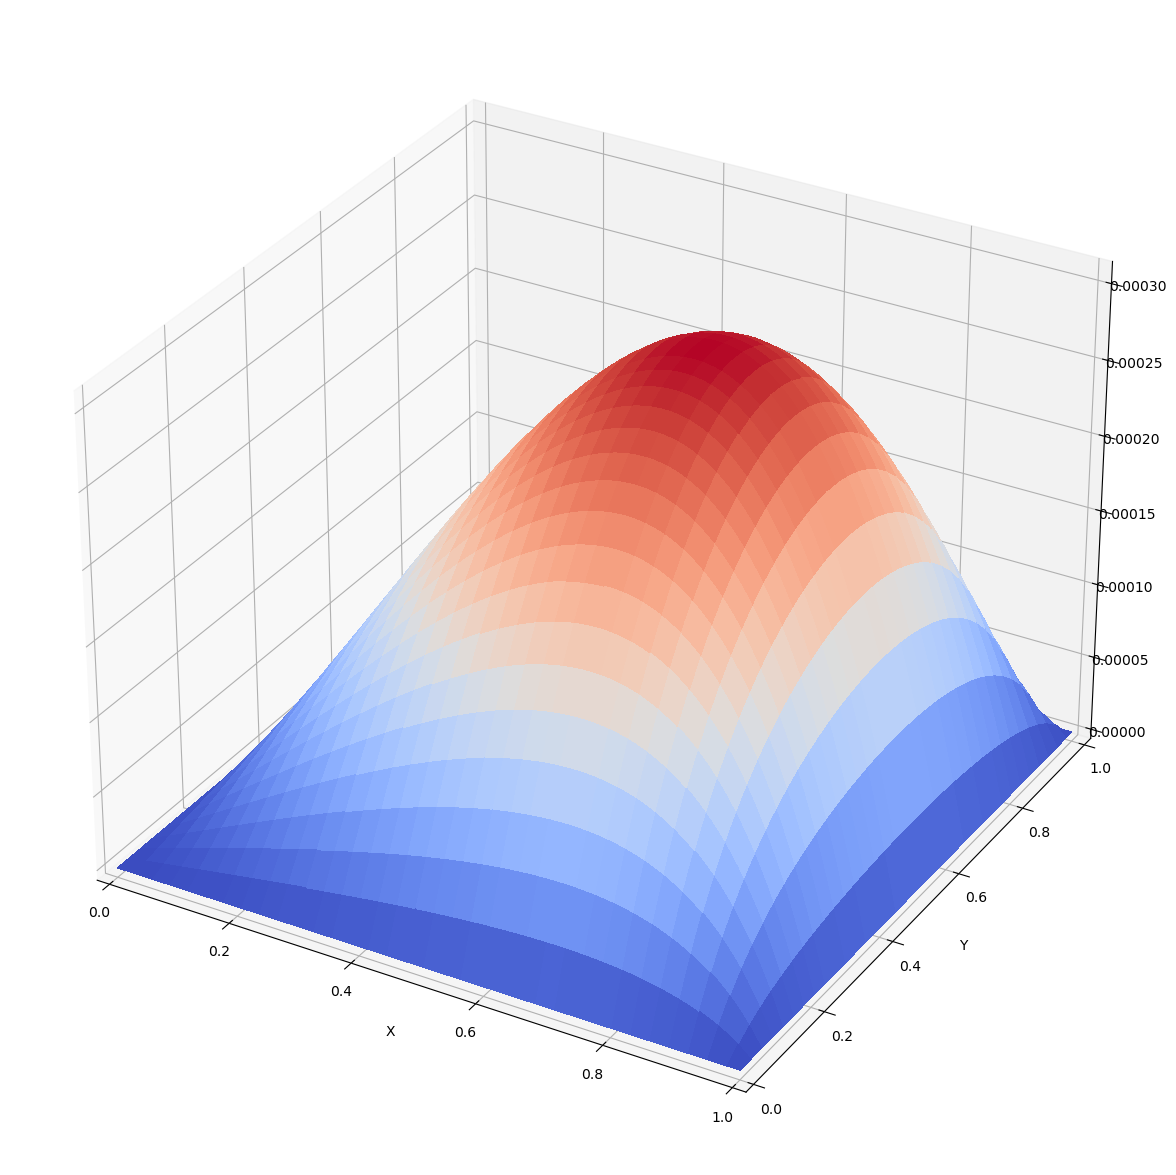

In [5]:
def f(x,y):
    return x*y

def mu(x,y):
    return x+y

N=100

b = loadvec2d(N,f)
A = stima2d(N,mu)
Afull = A.full()

u = np.linalg.solve(Afull,b)
uu = np.zeros((N+2,N+2))
uu[1:N+1,1:N+1] = u.reshape(N,N)
x = np.linspace(0,1,N+2)
X,Y = np.meshgrid(x,x)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D surface
ax.plot_surface(X, Y, uu,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('X')
ax.set_xlim(0, 1)
ax.set_ylabel('Y')
ax.set_ylim(0, 1)
plt.show()

### Conclusiones

- La aplicación parece estar bien guíada dado que la gráfica creada verifica las condiciones de borde valiendo 0 en dichos puntos y es una función positiva.